# Predictive Modeling Discussions

* **a. Are you working on a REGRESSION or CLASSIFICATION problem?**

    The given problem can be approached as both REGRESSION OR CLASSIFICATION problem. I have decided to approach this as a **classification** problem by categorizing tracks with popularity < 50  as 0 (Unpopular) and songs with popularity > 50 as 1 (Popular) in a new columns called as `track_popularity_bin`. The goal is to come up with a classification model that would classify a track based on the characteristics as 0 or 1

* **b. Which variables are inputs?**

    Following variables are the final input variables I have identifed after EDA

    1. danceability
    2. energy
    3. key
    4. loudness
    5. mode
    6. speechiness
    7. acousticness
    8. instrumentalness
    9. liveness
    10. valence
    11. tempo
    12. duration_ms


* **c. Which variables are responses/outputs/outcomes/targets?**

    * `track_popularity_bin` is the target variable
    
* **d. Did you need to DERIVE the responses of interest by SUMMARIZING the available data?**
    
    * Yes

* **e. If so, what summary actions did you perform?**

    * Grouped the songs with `track_popularity` < 50 as 0 and track_popularity > 50 as 1 in a new column called as `track_popularity_bin`

* **f. Which variables are identifiers and should NOT be used in the models?**

    1. track_id
    2. track_album_id
    3. playlist_id
    4. track_name
    5. playlist_name
    6. track_artist
    
*   **g. Important: Answer this question after completing parts C and D. Return to this predictive modeling discussion section to answer the following:**
    
    _i. Which of the inputs do you think influence the response, based on your exploratory visualizations? Which exploratory visualization helped you identify potential input-to-output relationships? (If you are not sure which inputs seem to influence the response, it is okay to say so.)_
    
     **Answer**: Following visualizations helped with identifying the potential input-to-output relationships

     1. Conditional Distribution of continuous variables GROUPED BY the response (target) variable
     2. Relationships between continuous variables GROUPED BY the response (target) variable
     3. Conditional Distribution of continuous variables GROUPED BY the response (target) variable and additional categorical variable

     **Inputs that influence response:**
     Continuous variables that represent the characteristics of a track (danceability, energy, loudness, valence, tempo etc.,) influence the response (target) variable


## Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.cluster import hierarchy

In [ ]:
sns.set_palette("colorblind")

## Loading the Dataset

The following steps loads the dataset from the given URL into a pandas dataframe named `df`

In [ ]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df_main = pd.read_csv(songs_url)

# Creating a copy. Keeping the main df intact in case needed for further analysis
df = df_main.copy()

## Basic Info about the dataset

First, I find the dimensionality of the pandas dataframe using the `df.shape` method. This tells how many rows, columns are there in the dataframe. In this case it is 32833 rows and 23 columns

In [ ]:
df.shape

Then, I'm exploring the datatypes, count of not-null values in every column of the dataset using the `df.info()` method

In [ ]:
df.info()

Also, below is the description of each of the column in the dataset

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

## Analyzing target/output variable `track_popularity`

Above histogram shows that track_popularity is mostly normally distributed but the value 0 has lot more entries that other values. We can further confirm that using the following boxplot

### Analysis

In [ ]:
df.track_popularity.describe()

In [ ]:
df.track_id.nunique()

In [ ]:
sns.boxplot(x=df["track_popularity"], showmeans=True, width=0.2)

In [ ]:
sns.displot(data = df, x='track_popularity', binwidth=5, aspect=1.25)

plt.show()

In [ ]:
# percentage of tracks with `track_popularity` = 0
print('percentage of tracks with `track_popularity` as 0 = ', np.mean( df.track_popularity == 0 ) * 100, '%')

# percentage of tracks with `track_popularity` = 100
print('percentage of tracks with `track_popularity` as 100 = ', np.mean( df.track_popularity == 100 ) * 100, '%')

⭐ **Above plots reveal that although `track_popularity` is an integer column it is not a continous output. The values are between 0 and 100. A linear regression would work best if the output is continous. Since that is not the case this can be better approached classification problem.**

✨ To do that I will be creating a new column called as `track_popularity_bin`. Tracks with `track_popularity` > 50 will be considered as 1 (popular) and the ones <= 50 will be considered as 0 (unpopular)

In [ ]:
df['track_popularity_bin'] = np.where( df.track_popularity > 50, 1, 0 )

In [ ]:
df = df.astype({'track_popularity_bin': 'object'})

In [ ]:
df.track_popularity_bin.value_counts(normalize=True)

💡 Although not perfectly balanced, the binary outcome is not overly imbalanced and so conventional classification approaches can be applied.

### Handle Duplicates

The dataframe has 32833 rows but the above analysis tells me that each row doesn't have a unique `track_id` and that is why number of unique `track_id` is 28356 and not 32833

Then, I look to see if the charactersistics of the duplicated tracks change across the entry

In [ ]:
track_characteristics=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [ ]:
for tc in track_characteristics:
    print(f'==={tc}===')
    print(df.groupby(['track_id']).\
    aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
              num_charc_values = (tc, 'nunique')).\
    reset_index().\
    nunique())

💡 The above analysis reveals that there is 1 and only 1 value for num_track_pop_values and num_valence_values. Thus, all unique tracks have a single track_popularity value and single value for the characteristics.

 📌 Based on this info, **we can remove the duplicate tracks by retaining only the first occurance of a track_id**

In [ ]:
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

In [ ]:
df.info()

# Exploratory Data Analysis

## Performing essential EDA using pandas methods
1. Missing Values
2. Unique Values

First, I look to see **number of missing values** for each column. This is important to know so that I can elimate columns with too many missing values as those columns won't provide much insights about the dataset

In [ ]:
df.isna().sum()

The above analysis shows that only three columns `track_name`, `track_artist`, `track_album_name` have missing values and that too _very minimal number of rows_ with missing value.  So far, I have not dropped any columns based on missing values.

It is now time to look at **number of unique values** for each columns. Columns with too many unique values may not be informative or may lead to overfitting, while columns with too few unique values may not provide enough discriminative power.

In [ ]:
df.nunique(dropna=False)

📌 Above analysis reveals that although `key` and `mode` are numeric columns those have only few unique values. So, we can treat these columns as categorical for analysis purposes

## Analyzing and Visualizing Categorical Variables

Based on the dataframe info we can determine that following columns are categorical variables

1. track_id
2. track_name
3. track_artist
4. track_album_id
5. track_album_name
6. track_album_release_date
7. playlist_name
8. playlist_id
9. playlist_genre
10. playlist_subgenre




In [ ]:
df.describe(include='object')

❌ There are far too many unique values in the columns `track_artist`, `playlist_name`, `track_album_name`, `track_name`. This makes these columns not very useful for training a model and it is not practical to show visualization for these columns. Note: Reg visualization I confirmed with the instructor on the Coursera Discussion Forum that it is not necessary to show visualization for categorical variables with far too many unique values.

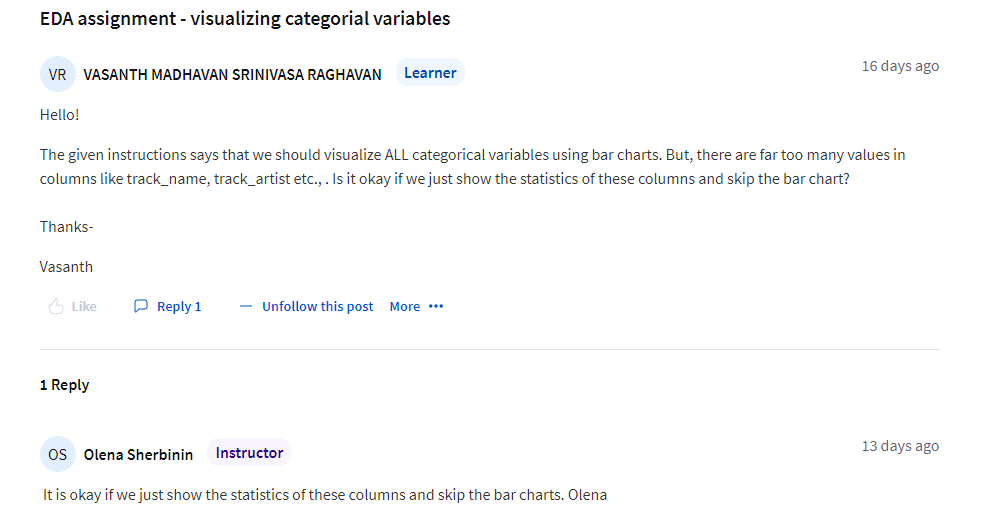

❌ Identifier columns like `track_id`, `track_album_id` and `playlist_id` will also not be very useful

In [ ]:
df.drop(['track_id','track_album_id','playlist_id','track_artist','playlist_name', 'track_name', 'track_album_name'],
        inplace=True,
        axis=1)

In [ ]:
df.info()

### Create new columns

The given data presents us with the opportunity to create additional columns. These new columns may have an impact on the target variable.

In this case, I have used  the column `track_album_release_date` to create two new columns `release_year` and `release_month`

In [ ]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='mixed')

In [ ]:
df['release_year'] = df.track_album_release_date.dt.year

In [ ]:
sns.catplot(data = df, y='release_year', kind='count', height=10, aspect=2)

plt.show()

💡 As seen above, the dataset is mostly made of songs released in the recent years rather than older years. This suggests that we can probably create one more variable that represents the release_year in two buckets. We can put songs released after 2010 in one bucket and songs released before 2010 in another

In [ ]:
df['release_year_bin'] = np.where( df.release_year < 2010 , 'older', 'recent')

In [ ]:
df.release_year_bin.value_counts()

Next, I created the `release_month` column

In [ ]:
df['release_month'] = df.track_album_release_date.dt.month

In [ ]:
sns.catplot(data = df, y='release_month', kind='count', height=8, aspect=1.5)

plt.show()

💡 Majority of songs in the given dataset are release in the month of Jan

Since, `track_album_release_date` has been split into `release_year` and `release_month` the column can be dropped

In [ ]:
df.drop(['track_album_release_date'], axis=1, inplace=True)
df.info()

💡 Let's visualize additional variables - `key` and `mode`

Although, `key` and `mode` are numeric columns, since there are less unique values these can be considered as categorical variables



In [ ]:
sns.catplot(data = df, y='key', kind='count', height=5, aspect=2)

In [ ]:
sns.catplot(data = df, y='mode', kind='count', height=2, aspect=2)

## Analyzing and Visualizing Continous Variables


In [ ]:
df.describe()

The above table shows the basic statistics about the continous variables

For analyzing the continous variables, I start with creating a new data frame `df_lf` that will hold the data in the **LONG FORMAT**. This is done so that visualizations can be achieved easier using Seaborn

In [ ]:
df_features = df.select_dtypes('number').copy()
df_features.drop(['track_popularity'], axis=1, inplace=True) # Dropping Target variable

In [ ]:
df_objects = df.select_dtypes('object').copy()

In [ ]:
id_cols = ['rowid', 'track_popularity'] + df_objects.columns.to_list()

In [ ]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

In [ ]:
df_lf

💡 To visualize continous variable we will be using Histograms and KDE plots

In [ ]:
sns.displot(data = df_lf, x='value', col='variable', kind='hist', kde=True,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,
            col_wrap=3)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.tight_layout()
plt.show()

### 💡 Observation

* We can see that  speechiness, instrumentalness, liveness, acousticness are skewed right.

* loudness, mode, time_signature are skewed left.

* Only danceability, energy, valence, tempo have normal / approx normal distribution.

📌 Before we can use the data for modeling, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.

## Visualize Relatiopnships

### Categorical-to-categorical relationships

#### track_popularity_bin Vs playlist_genre

In [ ]:
sns.catplot( data = df, x='track_popularity_bin', hue='playlist_genre', kind='count' )

plt.show()

💡 The above visualization between `track_popularity_bin` and `playlist_genre` using **DODGED BAR CHART** shows that the `edm` genre is the most unpopular genre. Other genres have approx same number of tracks across both unpopular and popular categories. We can also see that `pop` and `rap` are the most popular genres

#### playlist_subgenre Vs playlist_genre

Next, visualizing the relationship between `playlist_subgenre` and `playlist_genre` using **HEATMAP**

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap( pd.crosstab( df.playlist_subgenre, df.playlist_genre ), ax = ax,
             annot=True, annot_kws={'size': 10}, fmt='d',
             cbar=False)

plt.show()

📌 Above heatmap shows that the `playlist_subgenre` is highly correlated with `playlist_genre`. With this information, `playlist_subgenre` field can be **dropped** from the dataset as having highly correlated variables doesn't add a lot of value for the final model.

In [ ]:
df.drop(columns=['playlist_subgenre'], inplace=True)


### Categorial to Continuous

#### Key Vs Track Popularity

In [ ]:
sns.catplot( data = df, x='key', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have higher value for `key`

#### Mode Vs Track Popularity

In [ ]:
sns.catplot( data = df, x='mode', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have 1 as the `mode`

#### Release Year Vs Track Popularity

In [ ]:
sns.boxplot(data=df, x="release_year_bin", y="track_popularity", showmeans=True)

The above observation tells us that songs released recently have higher popularity compared to the songs released in the older years. This gives us a good indication that `release_year_bin` can have impact on the `popularity`.

#### Release Month Vs Track Popularity

In [ ]:
sns.catplot(data=df, x="release_month", y="track_popularity", kind='point', aspect=2, linestyle='none')

💡 Tracks that were released during the months of October, November and December tend to have higher popularity.

### Continuous-to-Continuous Relationships

#### Corr plot for ALL variables

Correlation plot is one of the very effective way to view the relationships between continuous variables

Below is the corr plot for the given dataset

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(data = df.select_dtypes('number').corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 12},
            ax=ax)
plt.tight_layout()
plt.show()

💡 The above plot reveals the following
1. `energy` and `loudness` are highly positively correlated
2. `energy` and `acousticness` are highly negatively correlated
3. `track_popularity` has a low correlation with all other variables. This is good because we can use the other variables to "predict" track popularity

**Next, visualizing the relationships between few different continuous variables**

#### energy Vs danceability

In [ ]:
sns.relplot(data = df, x='energy', y='danceability')

plt.show()

💡Tracks with higher energy tend to be more danceable

#### acousticness Vs loudness

In [ ]:
sns.relplot(data = df, x='acousticness', y='loudness')

plt.show()

💡 Tracks that are more acoustic tend to be less louder than the tracks that are less acoustic

#### valence Vs danceability

In [ ]:
sns.relplot(data = df, x='valence', y='danceability')

plt.show()

💡 Danceability of tracks increase with increase in valence

### Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values

Will be visualizing the conditional distribution of continuous inputs group by the response variable `track_popularity_bin`

In [ ]:
sns.displot(data = df_lf, x='value', col='variable', kind='kde',
            hue='track_popularity_bin',
            facet_kws={'sharex': False, 'sharey': False},
            common_norm=False,
            col_wrap=3
           )

plt.show()

💡 **Observations**
* `danceability` of popular songs (track_popularity_bin=1) is higher than the unpopular songs (track_popularity_bin=0)
* `acousticness` on popular songs is lower than the unpopular songs
* popular songs tend to have lesser duration compared to the unpopular songs

### Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) variable and additional categorical variable


In [ ]:
sns.catplot(data = df_lf, x='track_popularity_bin', y='value', col='variable',
            hue='playlist_genre',
            kind='box',
            sharey=False,
            showmeans=True,
            col_wrap=3,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})
plt.show()

💡 **Observations**
* The `danceability` score is higher for **pop** and **rap** tracks in the popular category compared to the unpopular category
* Tracks of the genre **rock** tend to be longer in duration than other genres
* `loudness` seems to be higher for all genres in the popular category compared to the unpopular category
* **The distribution of the continuous variables vary for each genre. This allows to infer that the continuous variables by themselves is sufficient to determine the popularity of a track without relying on the genre**

### Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values

Here, leveraging SCATTER PLOT to visualize the relationships between continuous inputs GROUPED BY the response (outcome) unique values

#### tempo Vs valence GROUPED BY track_popularity_bin

In [ ]:
sns.relplot(data=df, x='tempo', y='valence', hue='track_popularity_bin')

plt.show()

💡 Popular tracks tend (track_popularity_bin=1) to have higher temp and valence compated to the unpopular tracks (track_popularity_bin=0)

#### tempo Vs danceability GROUPED BY track_popularity_bin

In [ ]:
sns.relplot(data=df, x='tempo', y='danceability', hue='track_popularity_bin')

plt.show()

💡**Observations**
1. The `danceability` increases as `tempo` increases
2. Popular songs tend to have higher tempo(track_popularity_bin=1) and danceability compared to the unpopular tracks (track_popularity_bin=1)
3. Given the `tempo` and `danceability` score one can determine the popularity of a track

#### acousticness Vs loudness GROUPED BY track_popularity_bin

In [ ]:
sns.relplot(data=df, x='acousticness', y='loudness', hue='track_popularity_bin')

plt.show()

💡Tracks that are more acoustic tend to be less louder

In [ ]:
sns.relplot(data=df, x='duration_ms', y='valence', hue='track_popularity_bin')

plt.show()

💡 **Observations**
1. Popular tracks sound more positive (higher `valence` value) and these songs have a shorter duration
2. Unpopular tracks sound more negative (lower `valence` value) and these songs have a longer duration

Next up, PAIR PLOT is used to visualize the relationships between the other continuous variables grouped by the target variable that weren't discussed above

In [ ]:
sns.pairplot(data=df[[ 'energy', 'key', 'mode',
                      'speechiness', 'instrumentalness',
                      'liveness', 'track_popularity_bin']],
             hue='track_popularity_bin',
             diag_kws={'common_norm': False})

plt.show()

💡 **Observations**

1. Track that have low `speechiness` tend to have high `instrumentalness`
2. Some popular tracks tend to have high `speechiness` as well as high `energy`. This could be because of tracks from `rap` genre that are speechy as well as highly energetic
3. Tracks that have high `liveness` tend to have high `energy`. This could be because songs that have high energy are more probable to be performed infront of live audience
4. Popular songs that have a `mode` of 1 tend to have high `key` value

### Visualize the counts of combinations between the response (outcome) and categorical inputs

In [ ]:
sns.catplot(data = df, x='playlist_genre', hue='track_popularity_bin', col='release_year_bin', kind='count', )

plt.show()

💡 **Observations**
1. `rock` used to be the most popular genre in the older years and it has been replaced by `pop` and `rap` in the recent years
2. `edm` is the most unpopular genre in the recent years

In [ ]:
df.playlist_genre.value_counts(normalize=True)

In [ ]:
sns.boxplot(x='track_popularity_bin', y='danceability', data=df)

## K-Means Clustering

Clustering is an unsupervised machine learning technique designed to group unlabeled examples based on their similarity to each other. For this exercise, we will be using the K-Means method for clustering the given dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
columns_to_use = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms',
                  'track_popularity_bin', 'playlist_genre']
df_kmeans = df[columns_to_use]

### Preprocessing

In [ ]:
df_kmeans.isna().sum()

💡 There are no MISSING VALUES in the dataset

In [ ]:
df_kmeans_features_clean = df_kmeans.select_dtypes('number').copy()

In [ ]:
sns.catplot(data = df_kmeans_features_clean, kind='box', aspect=2)

plt.show()

💡 **Since one variable is dominant the data has to be standardized first remove the MAGNITUDE and SCALE effect. KMeans considers SIMILAR to be based on DISTANCE. Distance depends on MAGNITUDE and SCALE**

In [ ]:
# Using sklearn StandardScaler to standardize the dataset

X = StandardScaler().fit_transform(df_kmeans_features_clean)

In [ ]:
sns.catplot(data = pd.DataFrame(X, columns=df_kmeans_features_clean.columns), kind='box', aspect=2)

plt.show()

📌 Variables have now been standardized

### Clustering

#### KMeans Clustering

##### Starting with two clusters

In [ ]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [ ]:
df_kmeans_clean_copy = df_kmeans.copy()

In [ ]:
df_kmeans_clean_copy['k2'] = pd.Series(clusters_2, index=df_kmeans_clean_copy.index ).astype('category')

In [ ]:
df_kmeans_clean_copy.k2.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

sns.heatmap(data = pd.crosstab(df_kmeans_clean_copy.track_popularity_bin,
                               df_kmeans_clean_copy.k2,
                               margins=True ),
            annot=True,
            annot_kws={"fontsize": 20},
            fmt='g',
            cbar=False,
            ax=ax)

plt.show()

The above heatmap tells us that most songs have ended up in cluster 0. This suggests that more clusters are needed to find songs with distinctive characteristics that end up in the popular and unpopular categories

##### Finding Optimal number of clusters

Will be finding optimal number of clusters using the KNEE BEND PLOT!

In [ ]:
tots_within = []

K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X)
    tots_within.append( km.inertia_ )

In [ ]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

📌 **Although, there isn't a clean KNEE BEND here we can see that the plot starts to bend around the cluster value of 5 and is prominent before 8. So, I have decided to go with 7 clusters for further analysis**

In [ ]:
clusters_7 = KMeans(n_clusters=7, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [ ]:
df_kmeans_clean_copy = df_kmeans.copy()

In [ ]:
df_kmeans_clean_copy['k7'] = pd.Series(clusters_7, index=df_kmeans_clean_copy.index ).astype('category')

In [ ]:
df_kmeans_clean_copy.k7.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

sns.heatmap(data = pd.crosstab(df_kmeans_clean_copy.track_popularity_bin,
                               df_kmeans_clean_copy.k7,
                               margins=True ),
            annot=True,
            annot_kws={"fontsize": 20},
            fmt='g',
            cbar=False,
            ax=ax)

plt.show()

💡 **The above heatmap tells that clusters 0,1,2 tend to have more unpopular songs than clusters 3,4,5,6. This is much better than two clusters**

#### Visualizing relationships and conditional distributions using PAIR PLOT

Finally, using PAIR PLOT to visualize the relationships between continuous variables GROUPED BY the cluster category as well as conditional distribution of each continuous variable GROUPED BY the cluster category

In [ ]:
# NOTE: I have used a sample of 5000 because my notebook kept crashing
sns.pairplot(data = df_kmeans_clean_copy.sample(5000), hue='k7', diag_kws={'common_norm': False},
             palette='viridis')

plt.show()

💡 **Observations**

1. Tracks in the clusters 0,1,2 tend to have higher `energy` compared to the clusters 3,4,5,6
2. Tracks in cluster 5 have lower `energy` and `duration_ms` between 200000 and 300000
3. Cluster 0 seems to be made of tracks with high `instrumentalness` and high `energy`


#### Hierarchical Clustering

##### Plotting the dendrogram

In [ ]:
hclust_ward = hierarchy.ward(X)

In [ ]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram(hclust_ward, no_labels=True )

plt.show()

In [ ]:
np.unique( hierarchy.cut_tree( hclust_ward, height=180).ravel() )

In [ ]:
df_kmeans_clean_copy['hclust_4'] = pd.Series( hierarchy.cut_tree( hclust_ward, height=180).ravel(),
                                              index=df_kmeans_clean_copy.index ).astype('object')

In [ ]:
sns.catplot(data = df_kmeans_clean_copy, x='hclust_4', kind='count')

plt.show()

In [ ]:
sns.relplot(data = df_kmeans_clean_copy, x='loudness', y='acousticness', hue='hclust_4')

plt.show()

##### Cluster Analysis

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(
    data = pd.crosstab(
        df.track_popularity_bin, df_kmeans_clean_copy.hclust_4, margins=True,
    ),
    annot=True,
    annot_kws={'fontsize': 20}, fmt='g',
    cbar=False,
    ax=ax)

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(
    data = pd.crosstab(
        df.track_popularity_bin, df_kmeans_clean_copy.hclust_4, margins=True, normalize='columns'
    )*100,
    annot=True,
    annot_kws={'fontsize': 10}, fmt='g',
    cbar=False,
    ax=ax)

plt.show()

##### 💡 Initial Observations

* **Cluster 2** has the highest percentage of unpopular songs

In [ ]:
# Reshape to long format to enable exploring ALL of the original variables GROUPED BY the clusters!

df_kmeans_clean_copy_lf = df_kmeans_clean_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'k7', 'hclust_4', 'track_popularity_bin'],
     value_vars=df_kmeans_features_clean[
         ['danceability', 'energy', 'key', 'loudness', 'mode', 
          'speechiness', 'acousticness', 'instrumentalness', 
          'liveness', 'valence', 'tempo', 'duration_ms', 
          ]])

In [ ]:
df_kmeans_clean_copy_lf

In [ ]:
sns.catplot(data = df_kmeans_clean_copy_lf[['hclust_4','variable','value']], 
            x='hclust_4', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='box',
            sharey=False)

plt.show()

###### 💡 Analysis of Boxplots by Clusters
1. **Danceability**
- Fairly consistent across clusters, with slight variations in medians and ranges.
- Most clusters have similar distributions, with some outliers.

2. **Energy**
- Significant variation across clusters.
- 👀 **cluster 3** has noticeably lower energy values compared to others.

3. **Key**
- Distributions appear consistent across clusters.
- Clusters do not show strong separation based on the **key**.

4. **Loudness**
- Slight variation in medians across clusters.

5. **Mode**
- 👀 Clear separation exists for this feature across clusters.

6. **Speechiness**
- Low values dominate most clusters, with a few clusters showing greater variability and high outliers.

7. **Acousticness**
- 👀 Strong differences across clusters.
- Some clusters have consistently high values, while others are lower.

8. **Instrumentalness**
- 👀 Significant variation across clusters.
- Some clusters have higher median values and larger ranges for this feature.

9. **Liveness**
- Variability in medians and ranges exists, but differences are not extreme.

10. **Valence**
- Distribution is relatively uniform across clusters.
- Slight variations in medians are observed.

11. **Tempo**
- Clear differences in medians and ranges across clusters.
- 👀 **Cluster 2** interquartile range (IQR) is very narrow compared to ther three clusters. This clearly confirms clustering of slower songs in this cluster.

12. **Duration (ms)**
- Significant separation across clusters.
- 👀 **Cluster 2** has consistently higher durations than others.

**General Insights**
1. **Distinct Clustering Features**:  
   - 💓 Features like **instrumentalness**, **duration_ms**, **acousticness**, **energy** and **tempo** show clear separation across clusters, making them key drivers of clustering.
2. **Uniform Features**:  
   - Features like **key** and **danceability** have consistent distributions, contributing less to cluster differentiation.
3. **Categorical Variables**:  
   - Features like **mode** separate clusters clearly due to their binary nature.



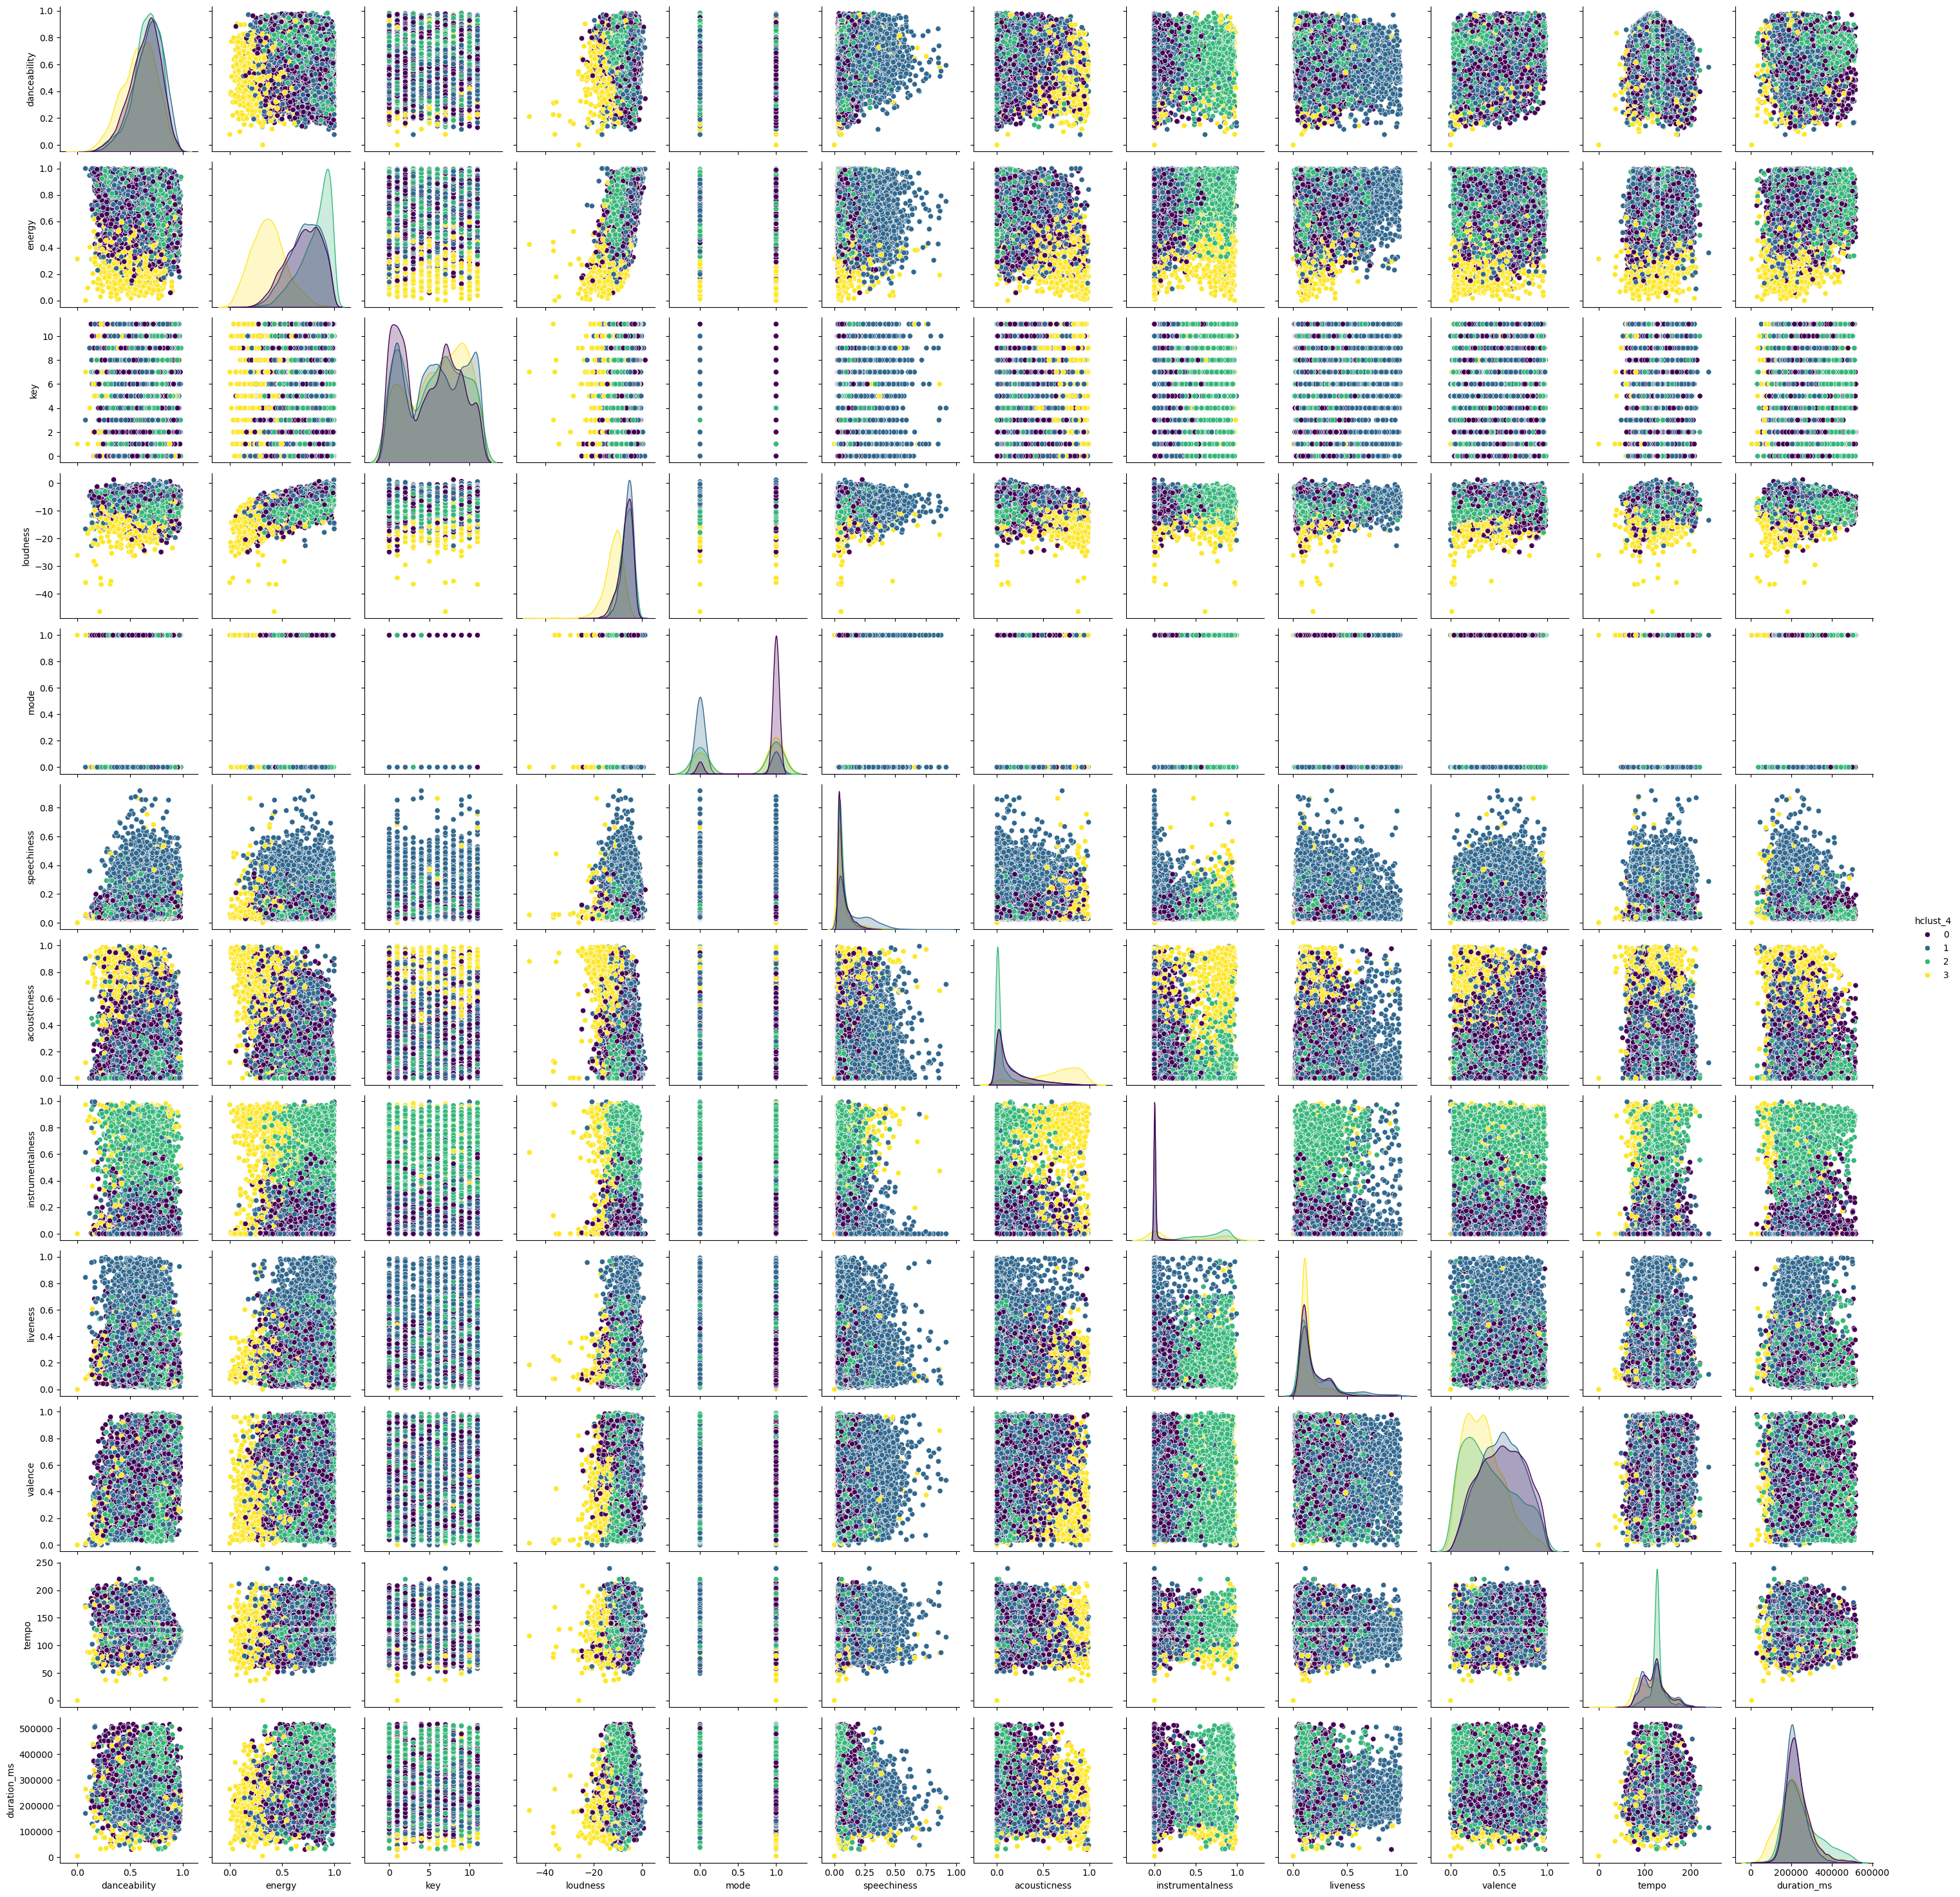

In [ ]:
sns.pairplot(data=df_kmeans_clean_copy[['danceability', 'energy', 'key', 'loudness', 'mode', 
                                        'speechiness', 'acousticness', 'instrumentalness', 
                                        'liveness', 'valence', 'tempo', 'duration_ms','hclust_4']],
             hue='hclust_4', 
             diag_kws={'common_norm': False}, 
             palette='viridis')

plt.show()

-------------------